In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from pathlib import Path
csvpath = Path('./Resources/AVG_final.csv')
df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,Market Return,Portfolio Return
Date,,
2018-07-02,1.002766,1.003605
2018-07-03,0.998673,0.997506
2018-07-05,1.007006,1.005681
2018-07-06,1.015414,1.013786
2018-07-09,1.024706,1.025926


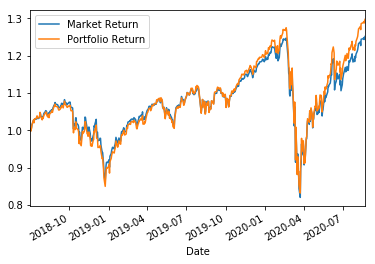

In [4]:
df.plot()

## Linear Regression Model with a single-training-window 

In [5]:
df["Lagged_Return"] = df["Portfolio Return"].shift()
df = df.dropna()
df.head()

,Market Return,Portfolio Return,Lagged_Return
Date,,,
2018-07-03,0.998673,0.997506,1.003605
2018-07-05,1.007006,1.005681,0.997506
2018-07-06,1.015414,1.013786,1.005681
2018-07-09,1.024706,1.025926,1.013786
2018-07-10,1.028135,1.027917,1.025926


In [6]:
training_window = 30
timeframe = len(df.index) - training_window - 1
print(timeframe)

506


In [7]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [8]:
# During rolling iteration, split into train and test sets.
# Use linear regression to predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = df.index[i]
    
    # End of training window
    end_of_training_period = df.index[training_window+i]

    # Window of test-window data
    test_day = df.index[training_window + i + 1]
    
    # String of testing window
    start_of_test_day  = test_day
    end_of_test_day = test_day
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_day:end_of_test_day]
    
    
    
    # Create new dataframes:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Portfolio Return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Portfolio Return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Portfolio Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)   

In [9]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.tail()

,Actual Returns,Portfolio Predictions,Predictions
2020-08-17,1.288934,1.286204,NaN
2020-08-18,1.291555,1.290272,NaN
2020-08-19,1.287606,1.293013,NaN
2020-08-20,1.291790,1.288386,NaN
2020-08-21,1.297428,1.293781,NaN


In [10]:
# X_test Data
split = int(0.25*timeframe)
results_test = Results.iloc[-split:]
results_test

,Actual Returns,Portfolio Predictions,Predictions
2020-02-21,1.251382,1.267715,NaN
2020-02-24,1.208006,1.250916,NaN
2020-02-25,1.170869,1.213773,NaN
2020-02-26,1.167213,1.174147,NaN
2020-02-27,1.115198,1.169038,NaN
2020-02-28,1.110896,1.095380,NaN
2020-03-02,1.158469,1.097104,NaN
2020-03-03,1.122507,1.160641,NaN
2020-03-04,1.167244,1.120176,NaN
2020-03-05,1.124519,1.169733,NaN


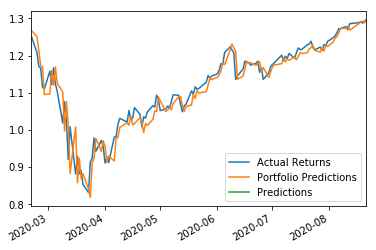

In [11]:
# Plot the results
results_test.plot()

## Same process with Market Return

In [12]:
df["Lagged Market Return"] = df["Market Return"].shift()
df = df.dropna()
df.head()

,Market Return,Portfolio Return,Lagged_Return,Lagged Market Return
Date,,,,
2018-07-05,1.007006,1.005681,0.997506,0.998673
2018-07-06,1.015414,1.013786,1.005681,1.007006
2018-07-09,1.024706,1.025926,1.013786,1.015414
2018-07-10,1.028135,1.027917,1.025926,1.024706
2018-07-11,1.021092,1.020872,1.027917,1.028135


In [13]:
training_window = 30
timeframe = len(df.index) - training_window-1
print(timeframe)

505


In [14]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
market_predictions = pd.DataFrame(columns=["Market Predictions"])
market_actuals = pd.DataFrame(columns=["Actual Market Returns"])

In [15]:
# During rolling iteration, split into train and test sets.
# Use linear regression to predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = df.index[i]
    
    # End of training window
    end_of_training_period = df.index[training_window+i]

    # Window of test-window data
    test_day = df.index[training_window + i + 1]
    
    # String of testing window
    start_of_test_day  = test_day
    end_of_test_day = test_day
    
    train = df.loc[start_of_training_period:end_of_training_period]
    test = df.loc[start_of_test_day:end_of_test_day]
    
    
    
    # Create new dataframes:
    X_train = train["Lagged Market Return"].to_frame()
    y_train = train["Market Return"]
    X_test = test["Lagged Market Return"].to_frame()
    y_test = test["Market Return"]

    model_1 = LinearRegression()
    model_1.fit(X_train, y_train)
    predictions = model_1.predict(X_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Market Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Market Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    market_predictions = market_predictions.append(predictions)
    market_actuals = market_actuals.append(actuals)   

In [16]:
Results_market = pd.concat([market_actuals, market_predictions], axis=1)
Results_market.tail()

,Actual Market Returns,Market Predictions
2020-08-17,1.245916,1.243781
2020-08-18,1.248645,1.246461
2020-08-19,1.243482,1.249465
2020-08-20,1.247281,1.243797
2020-08-21,1.251669,1.248557


In [17]:
# X_test Data
split = int(0.25*timeframe)
results_market = Results_market.iloc[-split:]
results_market

,Actual Market Returns,Market Predictions
2020-02-21,1.229728,1.241188
2020-02-24,1.188871,1.229128
2020-02-25,1.153066,1.195031
2020-02-26,1.148826,1.155633
2020-02-27,1.097201,1.149463
2020-02-28,1.092076,1.073276
2020-03-02,1.139718,1.076025
2020-03-03,1.107489,1.141614
2020-03-04,1.153840,1.105435
2020-03-05,1.115270,1.156268


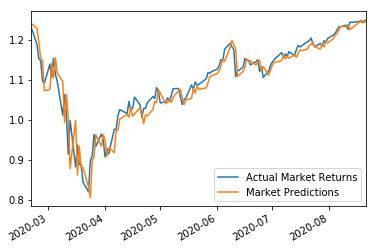

In [18]:
# Plot the results
results_market.plot()

In [19]:
agg_result = pd.concat([results_market, results_test], axis=1)
agg_result.head()

,Actual Market Returns,Market Predictions,Actual Returns,Portfolio Predictions,Predictions
2020-02-21,1.229728,1.241188,1.251382,1.267715,NaN
2020-02-24,1.188871,1.229128,1.208006,1.250916,NaN
2020-02-25,1.153066,1.195031,1.170869,1.213773,NaN
2020-02-26,1.148826,1.155633,1.167213,1.174147,NaN
2020-02-27,1.097201,1.149463,1.115198,1.169038,NaN


In [21]:
import matplotlib.pyplot as plt
import hvplot.pandas
agg_result.hvplot(width=900, height=500, legend='bottom_right').opts(title="Portfolio Returns vs. Market Return: AVG : Linear Regression")

:NdOverlay   [Variable]
   :Curve   [index]   (value)